In [1]:
# Importing the required libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

2023-08-04 22:06:13.169537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 22:06:13.527733: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 22:06:13.529017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 22:06:14.879934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
# Loading the dataset
df=pd.read_csv('url_spam_classification.csv',nrows=10000)
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [ ]:
#Converting the labels into binary, True = 1, False = 0
df['is_spam'] = df['is_spam'].replace(['True','False'],[1,0])
urls = df['url']
labels = df['is_spam']

In [3]:
# Preprocessing the data
max_len = 100 # maximum length of a URL
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [4]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2,random_state=42)

In [5]:
# Building the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-08-04 22:06:27.323339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-04 22:06:27.323827: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Training the model
# Iterating the model over the entire dataset 10 times since epochs=10
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 29s 106ms/step - loss: 0.6058 - accuracy: 0.7107 - val_loss: 0.6036 - val_accuracy: 0.7085
Epoch 2/10
250/250 [==============================] - 26s 105ms/step - loss: 0.6033 - accuracy: 0.7107 - val_loss: 0.6036 - val_accuracy: 0.7085
Epoch 3/10
250/250 [==============================] - 26s 105ms/step - loss: 0.6024 - accuracy: 0.7107 - val_loss: 0.6045 - val_accuracy: 0.7085
Epoch 4/10
250/250 [==============================] - 27s 106ms/step - loss: 0.6023 - accuracy: 0.7107 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 5/10
250/250 [==============================] - 27s 106ms/step - loss: 0.6020 - accuracy: 0.7107 - val_loss: 0.6070 - val_accuracy: 0.7085
Epoch 6/10
250/250 [==============================] - 26s 103ms/step - loss: 0.6026 - accuracy: 0.7107 - val_loss: 0.6035 - val_accuracy: 0.7085
Epoch 7/10
250/250 [==============================] - 26s 103ms/step - loss: 0.6021 - accuracy: 0.7107 - val_loss: 0.6043 - val_ac

In [8]:
# Evaluating the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print("Test accuracy:", acc)

63/63 [==============================] - 1s 20ms/step - loss: 0.6035 - accuracy: 0.7085
Test accuracy: 0.7085000276565552


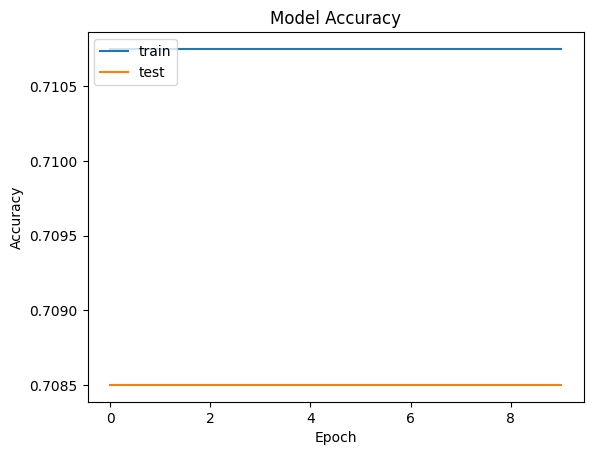

In [9]:
# Plotting the accuracy history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# Generating predictions and the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
print("Confusion matrix:\n", confusion_mtx)

63/63 [==============================] - 2s 21ms/step
Confusion matrix:
 [[1417    0]
 [ 583    0]]
